In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#read the airBNB dataset
df=pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
#last_review is not needed for the analysis so remove this column

df_sub=df.drop(columns=['last_review'],axis=1)

#df['last_review']=pd.to_datetime(df['last_review'])

In [ ]:
df_sub.shape

(48895, 15)

In [ ]:
df_sub.shape

(48895, 15)

In [ ]:
df_sub.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
missing_host_name_id=df_sub[df_sub['host_name'].isna()]['host_id']
index_value=list(missing_host_name_id.index)
k=0
for i in missing_host_name_id:
  ref_host_name=df_sub[(df_sub['host_id']==i) & (df_sub['host_name'].notna())]['host_name']
  df_sub.iloc[index_value[k]]['host_name']=ref_host_name
  k +=1


<ipython-input-84-6e26cb7f40fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.iloc[index_value[k]]['host_name']=ref_host_name


In [ ]:
#remove the column nan host_name
df_sub.dropna(subset=['host_name'],inplace=True)

In [ ]:
df_sub.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10047
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df_sub.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10047
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#finding the missing reviews per month
missing_host_name_id=df_sub[df_sub['reviews_per_month'].isna()]['host_id']
index_value=missing_host_name_id.index
#missing_host_name_id
k=0
for i in missing_host_name_id:
  #print(i)
  df_sub.loc[index_value[k],'reviews_per_month']=df_sub[df_sub['host_id']==i]['reviews_per_month'].mean()
  k +=1


In [ ]:
df_sub.isna().sum()

id                                   0
name                                16
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 7639
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
#impute the value for the reviews_per_month
from sklearn.impute import SimpleImputer

In [ ]:
imputer_m=SimpleImputer(strategy='constant',fill_value=0)


In [ ]:
df_sub['reviews_per_month']=imputer_m.fit_transform(df_sub[['reviews_per_month']])

In [ ]:
df_sub.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
#removing the column with 'name' as it doesnot impact the model
df_sub.drop(columns=['name'],inplace=True)

In [ ]:
print(df_sub.info())
print(df_sub.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48874 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48874 non-null  int64  
 1   host_id                         48874 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48874 non-null  object 
 4   neighbourhood                   48874 non-null  object 
 5   latitude                        48874 non-null  float64
 6   longitude                       48874 non-null  float64
 7   room_type                       48874 non-null  object 
 8   price                           48874 non-null  int64  
 9   minimum_nights                  48874 non-null  int64  
 10  number_of_reviews               48874 non-null  int64  
 11  reviews_per_month               48874 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
df_sub.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


<Axes: xlabel='neighbourhood_group'>

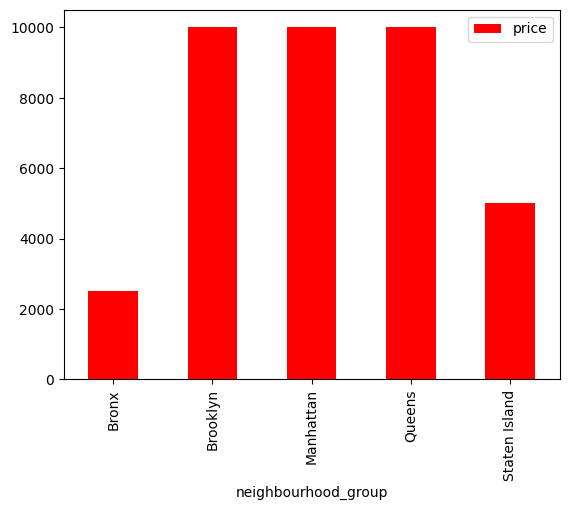

In [ ]:
#2) Which Neighbour Hood Group Has highest
#prices use bar chart to show this for all neighbourhood groups
df_sub.groupby('neighbourhood_group').max()[['price']].plot.bar(color='r')

<Axes: xlabel='neighbourhood_group'>

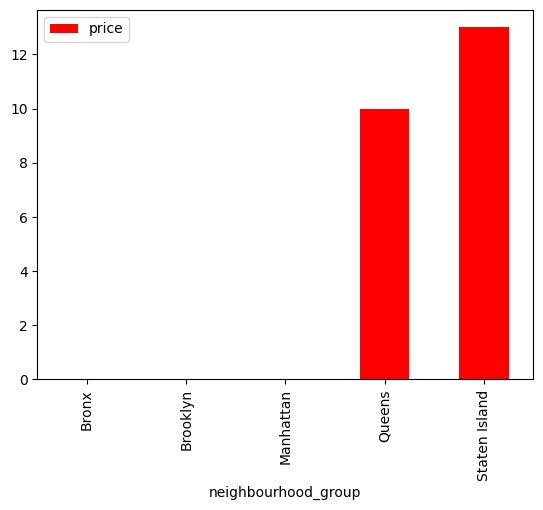

In [ ]:
#3) Which Neighbourhood group has lowest prices use bar
#chart to show this for all neighbourhood groups
df_sub.groupby('neighbourhood_group').min()[['price']].plot.bar(color='r')

In [ ]:
#4) Highest and lowest price airbnb in each Neighbour Hood Group
df_min_price=df_sub.groupby('neighbourhood_group').min()[['price']].rename(columns={'price':'Price_min'})
df_max_price=df_sub.groupby('neighbourhood_group').max()[['price']].rename(columns={'price':'price_max'})

df_max_min_price=pd.concat([df_min_price,df_max_price],axis=1)
df_max_min_price

,Price_min,price_max
neighbourhood_group,,
Bronx,0,2500
Brooklyn,0,10000
Manhattan,0,10000
Queens,10,10000
Staten Island,13,5000


In [ ]:
#5) Which Host has highest count of properties
max_count_properties_index=df_sub.groupby('host_name').count().idxmax()[0]
print(max_count_properties_index)


Michael


<ipython-input-101-b8815482ee2a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sub.groupby('neighbourhood').mean()[['price']].sort_values(by='price',ascending=False).iloc[0:10,:].plot(kind='bar',title='Top 10 expensive neighbourhood')


<Axes: title={'center': 'Top 10 expensive neighbourhood'}, xlabel='neighbourhood'>

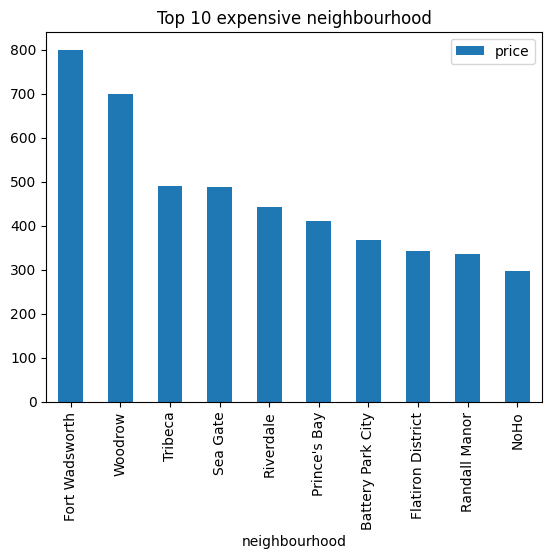

In [ ]:
#6) Which neighbourhood is most expensive and cheapest top 10 barchart
df_sub.groupby('neighbourhood').mean()[['price']].sort_values(by='price',ascending=False).iloc[0:10,:].plot(kind='bar',title='Top 10 expensive neighbourhood')


<ipython-input-102-6d7f0553796a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sub.groupby('neighbourhood').mean()[['price']].sort_values(by='price',ascending=True).iloc[0:10,:].plot(kind='bar',title='Top 10 cheep neighbourhood')


<Axes: title={'center': 'Top 10 cheep neighbourhood'}, xlabel='neighbourhood'>

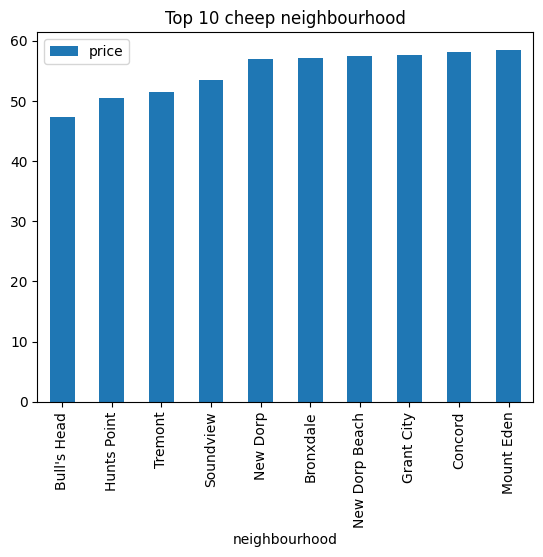

In [ ]:
df_sub.groupby('neighbourhood').mean()[['price']].sort_values(by='price',ascending=True).iloc[0:10,:].plot(kind='bar',title='Top 10 cheep neighbourhood')

<Axes: ylabel='id'>

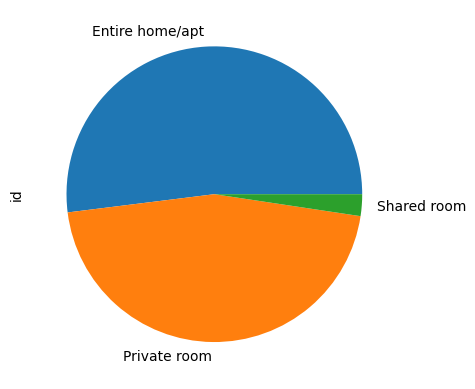

In [ ]:
#7) Count different type of room_type and do a pie chart
#showing % of each room type in overall dataset

df_sub.groupby('room_type').count()['id'].plot(kind='pie')



<Axes: xlabel='latitude', ylabel='longitude'>

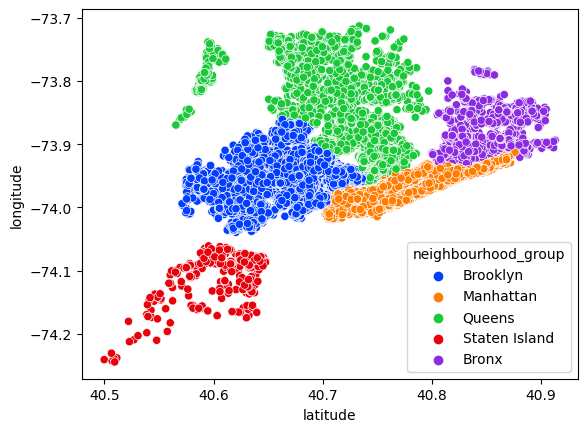

In [ ]:
#8) scatter plot between longitutude and latitude for different
#neighbourhood groups #palette = sns.color_palette("bright")
import seaborn as sns
sns.scatterplot(data=df_sub,x='latitude',y='longitude',hue='neighbourhood_group',palette='bright')

<Axes: xlabel='latitude', ylabel='longitude'>

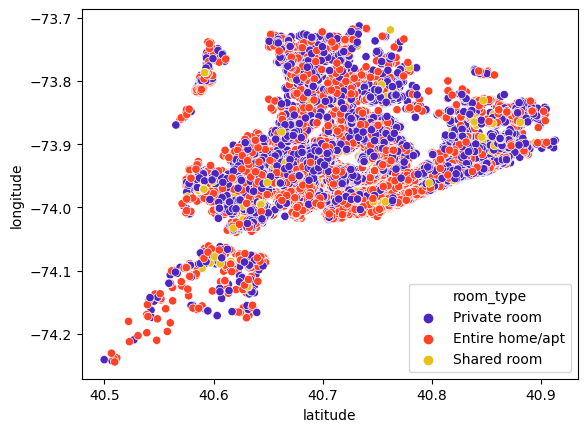

In [ ]:
#9) scatter plot between longitutude and latitude for different room_types
sns.scatterplot(data=df_sub,x='latitude',y='longitude',hue='room_type',palette='CMRmap')

<ipython-input-106-da02217ff162>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sub.groupby('room_type').mean().price.plot(kind='bar',title='by mean price')


<Axes: title={'center': 'by mean price'}, xlabel='room_type'>

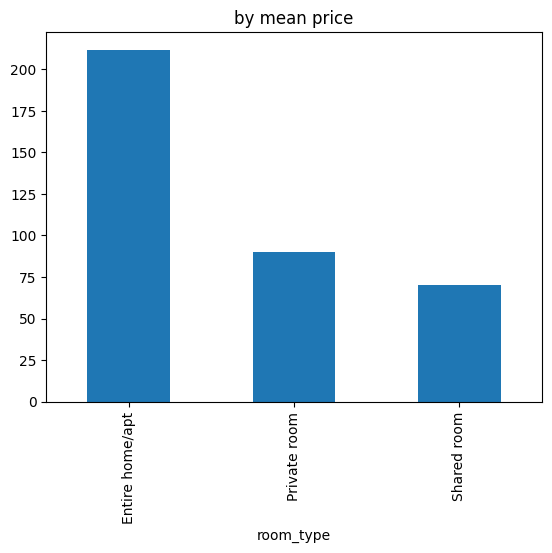

In [ ]:
#10) room_type vs price bar chart for the mean and highest and lowest
df_sub.groupby('room_type').mean().price.plot(kind='bar',title='by mean price')

<Axes: title={'center': 'by max price'}, xlabel='room_type'>

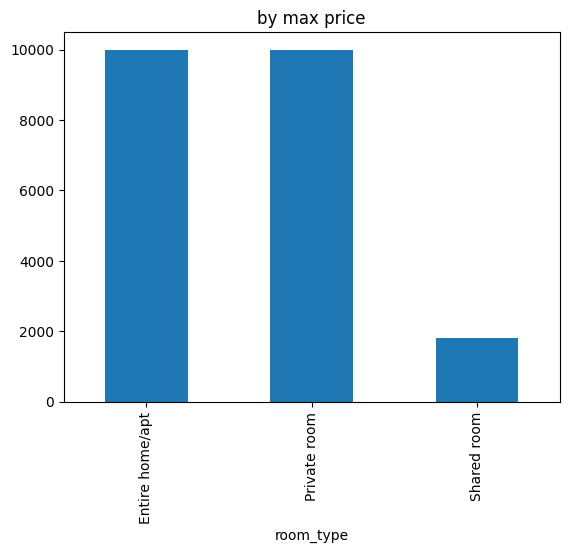

In [ ]:
df_sub.groupby('room_type').max().price.plot(kind='bar',title='by max price')

In [ ]:
df_sub.groupby('room_type').min().price

room_type
Entire home/apt    0
Private room       0
Shared room        0
Name: price, dtype: int64

<Axes: title={'center': 'by min price'}, xlabel='room_type'>

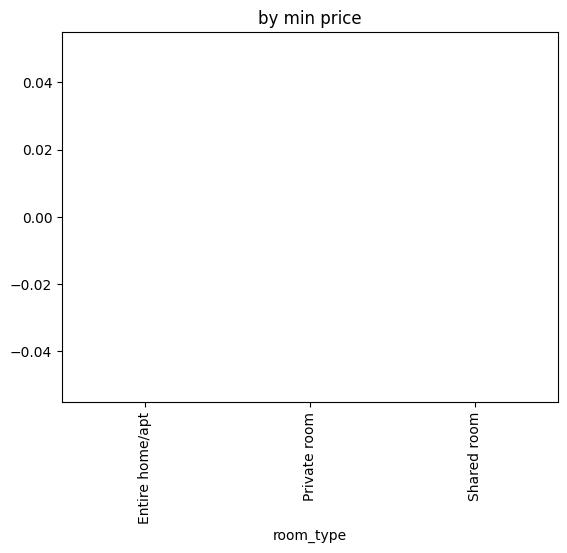

In [ ]:
df_sub.groupby('room_type').min().price.plot(kind='bar',title='by min price')

<Axes: xlabel='room_type', ylabel='count'>

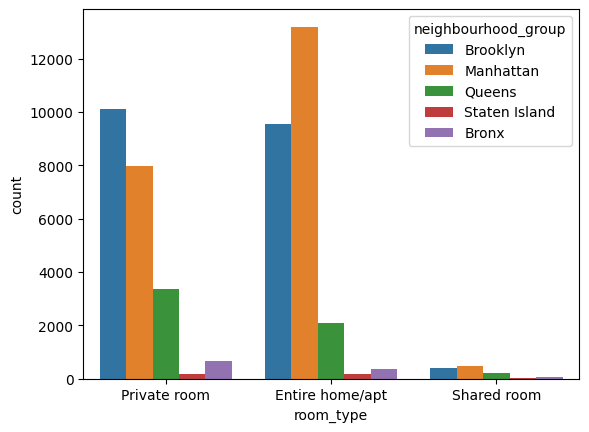

In [ ]:
#11) Do a similar plot to this
sns.countplot(x ='room_type', data = df_sub,hue='neighbourhood_group')

In [ ]:
df_sub.reset_index()

,index,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210,6,365
1,1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380,2,355
2,2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.000,1,365
3,3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640,1,194
4,4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48869,48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.650,2,9
48870,48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.000,2,36
48871,48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.000,1,27
48872,48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6.984,6,2


In [ ]:
df_sub.columns

Index(['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df_sub.isna().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_sub['neighbourhood'] = le.fit_transform(df_sub['neighbourhood'])

In [ ]:
df_sub

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,108,40.64749,-73.97237,Private room,149,1,9,0.210,6,365
1,2595,2845,Jennifer,Manhattan,127,40.75362,-73.98377,Entire home/apt,225,1,45,0.380,2,355
2,3647,4632,Elisabeth,Manhattan,94,40.80902,-73.94190,Private room,150,3,0,0.000,1,365
3,3831,4869,LisaRoxanne,Brooklyn,41,40.68514,-73.95976,Entire home/apt,89,1,270,4.640,1,194
4,5022,7192,Laura,Manhattan,61,40.79851,-73.94399,Entire home/apt,80,10,9,0.100,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,13,40.67853,-73.94995,Private room,70,2,0,0.650,2,9
48891,36485057,6570630,Marisol,Brooklyn,28,40.70184,-73.93317,Private room,40,4,0,0.000,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,94,40.81475,-73.94867,Entire home/apt,115,10,0,0.000,1,27
48893,36485609,30985759,Taz,Manhattan,95,40.75751,-73.99112,Shared room,55,1,0,6.984,6,2


In [ ]:
X=df_sub.drop(columns=['id','host_id','host_name','price','neighbourhood','availability_365'],axis=1)
y=df_sub['price']

In [ ]:
X

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,Brooklyn,40.64749,-73.97237,Private room,1,9,0.210,6
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,0.380,2
2,Manhattan,40.80902,-73.94190,Private room,3,0,0.000,1
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,4.640,1
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,0.100,1
...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,2,0,0.650,2
48891,Brooklyn,40.70184,-73.93317,Private room,4,0,0.000,2
48892,Manhattan,40.81475,-73.94867,Entire home/apt,10,0,0.000,1
48893,Manhattan,40.75751,-73.99112,Shared room,1,0,6.984,6


In [ ]:
df_sub.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,108,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,127,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,94,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,41,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,61,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#to change the categorical data into numerical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48874 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48874 non-null  object 
 1   latitude                        48874 non-null  float64
 2   longitude                       48874 non-null  float64
 3   room_type                       48874 non-null  object 
 4   minimum_nights                  48874 non-null  int64  
 5   number_of_reviews               48874 non-null  int64  
 6   reviews_per_month               48874 non-null  float64
 7   calculated_host_listings_count  48874 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 4.4+ MB


In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0,3])], remainder='passthrough')

x = np.array(ct.fit_transform(X))

In [ ]:
x

array([[ 0.   ,  1.   ,  0.   , ...,  9.   ,  0.21 ,  6.   ],
       [ 0.   ,  0.   ,  1.   , ..., 45.   ,  0.38 ,  2.   ],
       [ 0.   ,  0.   ,  1.   , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [ 0.   ,  0.   ,  1.   , ...,  0.   ,  0.   ,  1.   ],
       [ 0.   ,  0.   ,  1.   , ...,  0.   ,  6.984,  6.   ],
       [ 0.   ,  0.   ,  1.   , ...,  0.   ,  0.   ,  1.   ]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lgr=LinearRegression()
lgr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lgr.coef_,lgr.intercept_)

[ 3.61351963e+01 -1.22558928e+01  5.67660117e+01  2.28220900e+01
 -1.03467405e+02  7.83734423e+01 -2.59053078e+01 -5.24681345e+01
 -2.62347658e+02 -4.33691978e+02  2.53401424e-01 -1.81280522e-01
 -3.52582039e-01 -1.83195624e-03] -21282.15567706741


Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [ ]:
prediction=lgr.predict(X_test)

(0.0, 400.0)

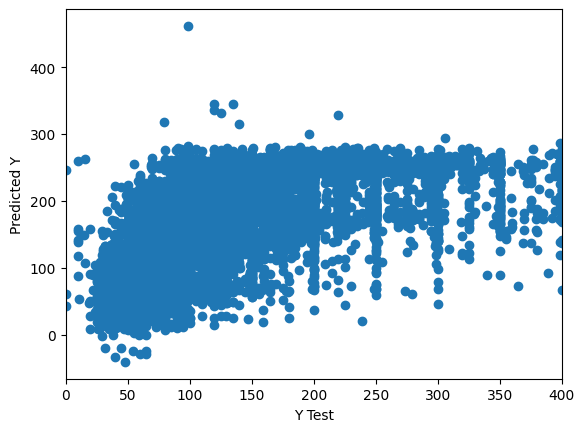

In [ ]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0,400)

Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

# calculate these metrics by hand!

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 73.98976900442872
MSE: 55504.14700542367
RMSE: 235.59318115222194


(-500.0, 500.0)

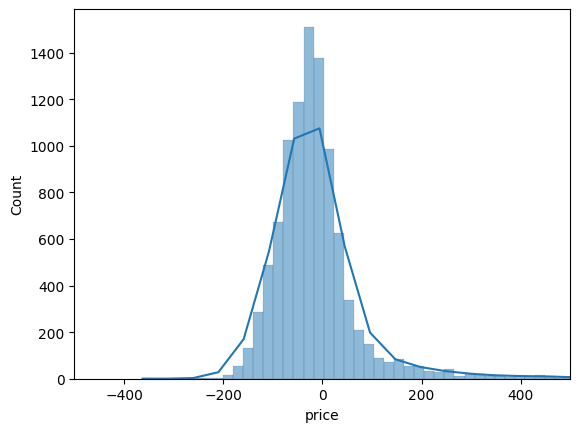

In [ ]:
#look at the residual
sns.histplot((y_test-prediction),bins=500,kde=True)
plt.xlim(-500,500)


In [ ]:
lgr.score(X_test,y_test)

0.08368202503605393

In [ ]:
#now we are using the polynomial model
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=3)
x_poly=pf.fit_transform(x)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=0)

In [ ]:
lgr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lgr.coef_,lgr.intercept_)

[-5.74958251e+03  1.36425551e+08 -1.98310511e+08 -1.98717176e+08
  7.84449368e+07 -6.73112241e+07  8.50317957e+06 -3.22523482e+06
 -6.60718788e+06  2.34517372e+07 -2.16350463e+08 -2.82312798e+06
 -1.85416571e+06 -5.06339277e+05 -4.58888873e+05  5.70225442e+07
  4.78849199e+05 -6.56589747e+05  5.43072718e+05 -4.26280884e+05
  1.93543411e+07  2.03672198e+07  1.93461250e+07  2.97737487e+06
 -4.11204499e+07  8.26380755e+05 -2.53577325e+05  5.24633439e+04
 -3.15762754e+05  1.30782445e+08  5.45772908e+05  2.03371893e+05
  3.29102003e+05  4.38281038e+07  4.44575783e+07  4.29286131e+07
  2.97200979e+06 -4.25431861e+07  9.54537576e+05  3.01130919e+05
 -1.71872036e+05 -1.31046643e+05 -1.72057119e+08 -3.31930066e+03
  2.91361152e+03 -5.73051476e+07 -5.65737210e+07 -5.81472471e+07
  8.46934406e+06 -5.00376748e+07  9.01908569e+05  2.76123348e+05
 -1.38151094e+05 -1.45539075e+05  3.77855733e+07 -1.05688494e+04
  1.26499401e+07  1.33395682e+07  1.17802370e+07  3.49696206e+06
 -4.22666787e+07  8.88563

In [ ]:
prediction=lgr.predict(X_test)

(0.0, 500.0)

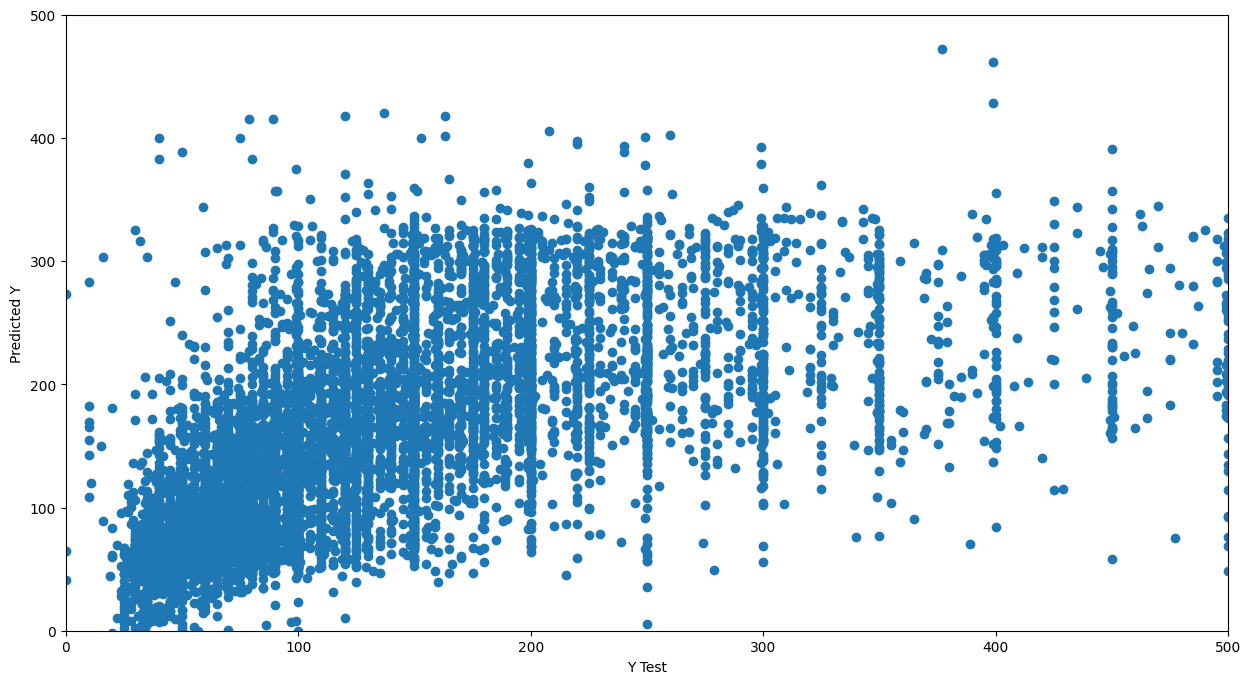

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0,500)
plt.ylim(0,500)

(-500.0, 500.0)

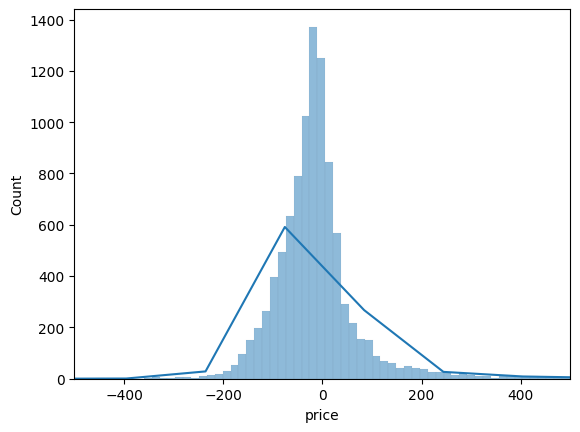

In [ ]:
#look at the residual
sns.histplot((y_test-prediction),bins=2000,kde=True)
plt.xlim(-500,500)

In [ ]:
lgr.score(X_test,y_test)

-0.7363261999042225